In [2]:
## Women in Data Science Datathon -- Building Energy Efficiency Prediction
## Created by: River Pham, Vy Mai, Umang Garg, Kathryn Linton
## Last edited: 2/15/2022 9:09PM

# Importing Library

In [1]:
# Essentials
import numpy as np
import pandas as pd
import datetime
import random

# Plots
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Upload Data

In [67]:
data = pd.read_csv('/Users/maingoclanvy/Documents/widsdatathon2022/train.csv')
test_data = pd.read_csv('/Users/maingoclanvy/Documents/widsdatathon2022/test.csv')
df = pd.DataFrame(data)

In [68]:
print("Number of train samples are",data.shape)
print("Number of train samples are",test_data.shape)

Number of train samples are (75757, 64)
Number of train samples are (9705, 63)


In [69]:
data.head()

,Year_Factor,State_Factor,building_class,facility_type,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,january_max_temp,february_min_temp,february_avg_temp,february_max_temp,march_min_temp,march_avg_temp,march_max_temp,april_min_temp,april_avg_temp,april_max_temp,may_min_temp,may_avg_temp,may_max_temp,june_min_temp,june_avg_temp,june_max_temp,july_min_temp,july_avg_temp,july_max_temp,august_min_temp,august_avg_temp,august_max_temp,september_min_temp,september_avg_temp,september_max_temp,october_min_temp,october_avg_temp,october_max_temp,november_min_temp,november_avg_temp,november_max_temp,december_min_temp,december_avg_temp,december_max_temp,cooling_degree_days,heating_degree_days,precipitation_inches,snowfall_inches,snowdepth_inches,avg_temp,days_below_30F,days_below_20F,days_below_10F,days_below_0F,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,site_eui,id
0,1,State_1,Commercial,Grocery_store_or_food_market,61242.0,1942.0,11.0,2.4,36,50.5,68,35,50.589286,73,40,53.693548,80,41,55.5,78,46,56.854839,84,50,60.5,90,52,62.725806,84,52,62.16129,85,52,64.65,90,47,63.016129,83,43,53.8,72,36,49.274194,71,115,2960,16.59,0.0,0,56.972603,0,0,0,0,14,0,0,0,1.0,1.0,1.0,NaN,248.682615,0
1,1,State_1,Commercial,Warehouse_Distribution_or_Shipping_center,274000.0,1955.0,45.0,1.8,36,50.5,68,35,50.589286,73,40,53.693548,80,41,55.5,78,46,56.854839,84,50,60.5,90,52,62.725806,84,52,62.16129,85,52,64.65,90,47,63.016129,83,43,53.8,72,36,49.274194,71,115,2960,16.59,0.0,0,56.972603,0,0,0,0,14,0,0,0,1.0,NaN,1.0,12.0,26.500150,1
2,1,State_1,Commercial,Retail_Enclosed_mall,280025.0,1951.0,97.0,1.8,36,50.5,68,35,50.589286,73,40,53.693548,80,41,55.5,78,46,56.854839,84,50,60.5,90,52,62.725806,84,52,62.16129,85,52,64.65,90,47,63.016129,83,43,53.8,72,36,49.274194,71,115,2960,16.59,0.0,0,56.972603,0,0,0,0,14,0,0,0,1.0,NaN,1.0,12.0,24.693619,2
3,1,State_1,Commercial,Education_Other_classroom,55325.0,1980.0,46.0,1.8,36,50.5,68,35,50.589286,73,40,53.693548,80,41,55.5,78,46,56.854839,84,50,60.5,90,52,62.725806,84,52,62.16129,85,52,64.65,90,47,63.016129,83,43,53.8,72,36,49.274194,71,115,2960,16.59,0.0,0,56.972603,0,0,0,0,14,0,0,0,1.0,NaN,1.0,12.0,48.406926,3
4,1,State_1,Commercial,Warehouse_Nonrefrigerated,66000.0,1985.0,100.0,2.4,36,50.5,68,35,50.589286,73,40,53.693548,80,41,55.5,78,46,56.854839,84,50,60.5,90,52,62.725806,84,52,62.16129,85,52,64.65,90,47,63.016129,83,43,53.8,72,36,49.274194,71,115,2960,16.59,0.0,0,56.972603,0,0,0,0,14,0,0,0,1.0,1.0,1.0,NaN,3.899395,4


# Exploratory Descriptive Analysis

In [70]:
#Summary Statistics
data.describe()

,Year_Factor,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,january_max_temp,february_min_temp,february_avg_temp,february_max_temp,march_min_temp,march_avg_temp,march_max_temp,april_min_temp,april_avg_temp,april_max_temp,may_min_temp,may_avg_temp,may_max_temp,june_min_temp,june_avg_temp,june_max_temp,july_min_temp,july_avg_temp,july_max_temp,august_min_temp,august_avg_temp,august_max_temp,september_min_temp,september_avg_temp,september_max_temp,october_min_temp,october_avg_temp,october_max_temp,november_min_temp,november_avg_temp,november_max_temp,december_min_temp,december_avg_temp,december_max_temp,cooling_degree_days,heating_degree_days,precipitation_inches,snowfall_inches,snowdepth_inches,avg_temp,days_below_30F,days_below_20F,days_below_10F,days_below_0F,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,site_eui,id
count,75757.000000,7.575700e+04,73920.000000,49048.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,34675.000000,33946.000000,34675.000000,29961.000000,75757.000000,75757.000000
mean,4.367755,1.659839e+05,1952.306764,61.048605,39.506323,11.432343,34.310468,59.054952,11.720567,35.526837,58.486278,21.606281,44.469292,70.897831,32.037171,53.784863,82.661932,44.706179,63.742547,88.987856,51.131763,71.066384,91.400280,60.571604,76.596879,95.543950,58.515068,75.348749,92.572581,50.791689,69.597545,92.171139,38.210911,58.727038,81.135671,28.630397,48.123133,71.202397,22.736777,41.625569,64.496852,1202.250446,4324.957390,42.430651,29.136379,164.862455,56.176705,48.756511,17.447932,4.886532,0.876764,82.709809,14.058701,0.279539,0.002442,66.552675,62.779974,4.190601,109.142051,82.584693,37878.000000
std,1.471441,2.468758e+05,37.053619,28.663683,60.656596,9.381027,6.996108,5.355458,12.577272,8.866697,8.414611,10.004303,6.657142,7.680982,5.577279,2.500473,4.101028,4.200319,2.792919,2.864669,3.415926,2.861681,3.604068,4.177109,4.090275,4.157118,4.441992,3.818895,4.139685,4.290884,3.603773,5.011708,5.093899,2.641300,5.579513,7.153244,4.094207,4.373374,9.014047,5.869386,6.054104,391.561780,824.366727,10.592205,17.810894,175.275869,2.241940,27.587124,14.469435,7.071221,2.894244,25.282913,10.943996,2.252323,0.142140,131.147834,130.308106,6.458789,50.699751,58.255403,21869.306509
min,1.000000,9.430000e+02,0.000000,0.000000,-6.400000,-19.000000,10.806452,42.000000,-13.000000,13.250000,38.000000,-9.000000,25.854839,53.000000,15.000000,40.280000,62.000000,23.000000,46.950000,64.000000,30.000000,54.100000,67.000000,37.000000,54.822581,65.000000,31.000000,56.693548,66.000000,26.000000,53.600000,64.000000,18.000000,44.693548,59.000000,4.000000,30.766667,53.000000,-16.000000,23.790323,42.000000,0.000000,398.000000,0.000000,0.000000,0.000000,44.512329,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,12.000000,1.001169,0.000000
25%,3.000000,6.237900e+04,1927.000000,40.000000,11.900000,6.000000,29.827586,56.000000,2.000000,31.625000,55.000000,13.000000,38.096774,62.000000,26.000000,52.333333,80.000000,42.000000,62.790323,88.000000,50.000000,70.983333,89.000000,57.000000,76.145161,95.000000,57.000000,74.516129,90.000000,47.000000,68.200000,91.000000,35.000000,58.048387,78.000000,23.000000,45.250000,69.000000,17.000000,38.532258,60.000000,1128.000000,3978

In [71]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75757 entries, 0 to 75756
Data columns (total 64 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Year_Factor                75757 non-null  int64  
 1   State_Factor               75757 non-null  object 
 2   building_class             75757 non-null  object 
 3   facility_type              75757 non-null  object 
 4   floor_area                 75757 non-null  float64
 5   year_built                 73920 non-null  float64
 6   energy_star_rating         49048 non-null  float64
 7   ELEVATION                  75757 non-null  float64
 8   january_min_temp           75757 non-null  int64  
 9   january_avg_temp           75757 non-null  float64
 10  january_max_temp           75757 non-null  int64  
 11  february_min_temp          75757 non-null  int64  
 12  february_avg_temp          75757 non-null  float64
 13  february_max_temp          75757 non-null  int

In [72]:
#Columns
data.columns

Index(['Year_Factor', 'State_Factor', 'building_class', 'facility_type',
       'floor_area', 'year_built', 'energy_star_rating', 'ELEVATION',
       'january_min_temp', 'january_avg_temp', 'january_max_temp',
       'february_min_temp', 'february_avg_temp', 'february_max_temp',
       'march_min_temp', 'march_avg_temp', 'march_max_temp', 'april_min_temp',
       'april_avg_temp', 'april_max_temp', 'may_min_temp', 'may_avg_temp',
       'may_max_temp', 'june_min_temp', 'june_avg_temp', 'june_max_temp',
       'july_min_temp', 'july_avg_temp', 'july_max_temp', 'august_min_temp',
       'august_avg_temp', 'august_max_temp', 'september_min_temp',
       'september_avg_temp', 'september_max_temp', 'october_min_temp',
       'october_avg_temp', 'october_max_temp', 'november_min_temp',
       'november_avg_temp', 'november_max_temp', 'december_min_temp',
       'december_avg_temp', 'december_max_temp', 'cooling_degree_days',
       'heating_degree_days', 'precipitation_inches', 'snowfall_inc

## Check Missing Values

In [73]:
pd.set_option('display.max_rows', 1000)

In [74]:
data.isna().sum()

Year_Factor                      0
State_Factor                     0
building_class                   0
facility_type                    0
floor_area                       0
year_built                    1837
energy_star_rating           26709
ELEVATION                        0
january_min_temp                 0
january_avg_temp                 0
january_max_temp                 0
february_min_temp                0
february_avg_temp                0
february_max_temp                0
march_min_temp                   0
march_avg_temp                   0
march_max_temp                   0
april_min_temp                   0
april_avg_temp                   0
april_max_temp                   0
may_min_temp                     0
may_avg_temp                     0
may_max_temp                     0
june_min_temp                    0
june_avg_temp                    0
june_max_temp                    0
july_min_temp                    0
july_avg_temp                    0
july_max_temp       

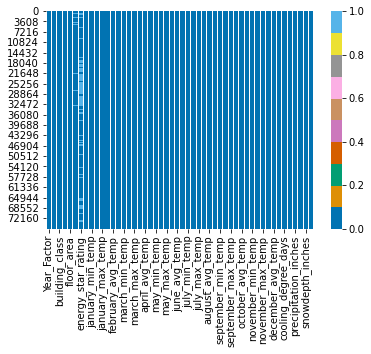

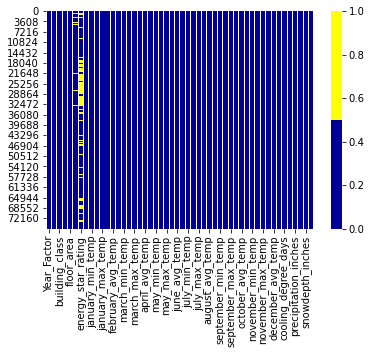

In [75]:
## Dealing with Missing Data!
# Creating Missing Data Heatmap
cols = df.columns[:50] # first 30 columns
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(palette='colorblind')) 
plt.show()
# or you can also define a palette on your own by giving a hexcolor code as below. 
# Below we are defining two colors yellow and blue for missing and non-missing data.
colors = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
# now we will use this palette in heatmap() of sns
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colors))
plt.show()

created missing indicator for: year_built
created missing indicator for: energy_star_rating
created missing indicator for: direction_max_wind_speed
created missing indicator for: direction_peak_wind_speed
created missing indicator for: max_wind_speed
created missing indicator for: days_with_fog


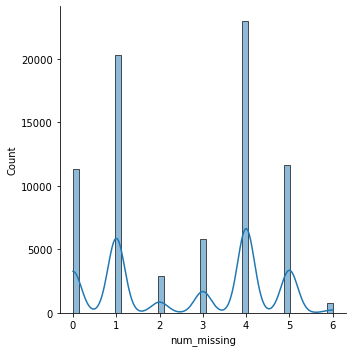

<AxesSubplot:xlabel='index'>

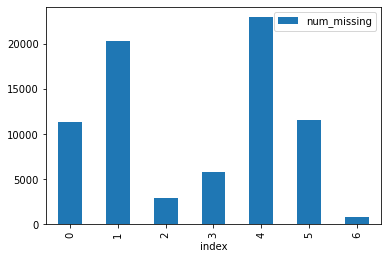

In [76]:
#Dealing with Missing Data!
#Technique 2: Creating Missing Data Distribution Plot
# first create missing indicator for columns with missing data
for col in df.columns:
    missing = df[col].isnull() #missing will create a series with all the columns with null values
    num_missing = missing.sum() #this will sum up all the rows that have nulls   
    #now we want to store the columns which have missing data
    if num_missing > 0:  #this condition is still in the for loop.
        print('created missing indicator for: {}'.format(col)) #prints all columns which have missing data
        df['{}_ismissing'.format(col)] = missing 
        
        #this will take values from missing series one by one and create a column for them
        
# then based on the indicator, plot the histogram of missing values
ismissing_cols = [col for col in df.columns if 'ismissing' in col] #searching for ismissing in col using list 
#comprehension and storing it in ismissing_cols
df['num_missing'] = df[ismissing_cols].sum(axis=1) #create a new column 'num_missing' 

#using displot() from seaborn to plot a distributional summary
sns.displot(data=df,x='num_missing',kde=True)
plt.show()

#You can also plot the histogram using below command. try it!
df['num_missing'].value_counts().reset_index().sort_values(by='index').plot.bar(x='index', y='num_missing')

In [77]:
# Check for percentage of missing values
for col in df.columns:
    pct_missing = df[col].isnull().mean() #calculating % of missing values. calling numpy (np)
    print('{} - {}%'.format(col, round(pct_missing*100))) #lookup format function
print(pct_missing)

Year_Factor - 0%
State_Factor - 0%
building_class - 0%
facility_type - 0%
floor_area - 0%
year_built - 2%
energy_star_rating - 35%
ELEVATION - 0%
january_min_temp - 0%
january_avg_temp - 0%
january_max_temp - 0%
february_min_temp - 0%
february_avg_temp - 0%
february_max_temp - 0%
march_min_temp - 0%
march_avg_temp - 0%
march_max_temp - 0%
april_min_temp - 0%
april_avg_temp - 0%
april_max_temp - 0%
may_min_temp - 0%
may_avg_temp - 0%
may_max_temp - 0%
june_min_temp - 0%
june_avg_temp - 0%
june_max_temp - 0%
july_min_temp - 0%
july_avg_temp - 0%
july_max_temp - 0%
august_min_temp - 0%
august_avg_temp - 0%
august_max_temp - 0%
september_min_temp - 0%
september_avg_temp - 0%
september_max_temp - 0%
october_min_temp - 0%
october_avg_temp - 0%
october_max_temp - 0%
november_min_temp - 0%
november_avg_temp - 0%
november_max_temp - 0%
december_min_temp - 0%
december_avg_temp - 0%
december_max_temp - 0%
cooling_degree_days - 0%
heating_degree_days - 0%
precipitation_inches - 0%
snowfall_inches 

## Impute Missing Values

In [87]:
df['ELEVATION'].describe()

count    75757.000000
mean        39.506323
std         60.656596
min         -6.400000
25%         11.900000
50%         25.000000
75%         42.700000
max       1924.500000
Name: ELEVATION, dtype: float64

In [78]:
df.columns

Index(['Year_Factor', 'State_Factor', 'building_class', 'facility_type',
       'floor_area', 'year_built', 'energy_star_rating', 'ELEVATION',
       'january_min_temp', 'january_avg_temp', 'january_max_temp',
       'february_min_temp', 'february_avg_temp', 'february_max_temp',
       'march_min_temp', 'march_avg_temp', 'march_max_temp', 'april_min_temp',
       'april_avg_temp', 'april_max_temp', 'may_min_temp', 'may_avg_temp',
       'may_max_temp', 'june_min_temp', 'june_avg_temp', 'june_max_temp',
       'july_min_temp', 'july_avg_temp', 'july_max_temp', 'august_min_temp',
       'august_avg_temp', 'august_max_temp', 'september_min_temp',
       'september_avg_temp', 'september_max_temp', 'october_min_temp',
       'october_avg_temp', 'october_max_temp', 'november_min_temp',
       'november_avg_temp', 'november_max_temp', 'december_min_temp',
       'december_avg_temp', 'december_max_temp', 'cooling_degree_days',
       'heating_degree_days', 'precipitation_inches', 'snowfall_inc

# Correlation

In [107]:
df1 = df.drop(columns=['january_min_temp', 'january_max_temp',
       'february_min_temp', 'february_max_temp',
       'march_min_temp','march_max_temp', 'april_min_temp', 'april_max_temp', 'may_min_temp',
       'may_max_temp', 'june_min_temp', 'june_max_temp',
       'july_min_temp', 'july_max_temp', 'august_min_temp',
       'august_max_temp', 'september_min_temp',
       'september_max_temp', 'october_min_temp',
     'october_max_temp', 'november_min_temp',
        'november_max_temp', 'december_min_temp',
        'december_max_temp', 'id', 'year_built_ismissing',
       'energy_star_rating_ismissing','direction_max_wind_speed_ismissing',
       'direction_peak_wind_speed_ismissing', 'max_wind_speed_ismissing',
       'days_with_fog_ismissing', 'num_missing','State_Factor', 'building_class', 'facility_type',
                      'january_avg_temp', 'february_avg_temp', 'march_avg_temp',
       'april_avg_temp', 'may_avg_temp', 'june_avg_temp', 'july_avg_temp',
       'august_avg_temp', 'september_avg_temp', 'october_avg_temp',
       'november_avg_temp', 'december_avg_temp'],
                 axis=1, inplace=False) #type in the columns that I would drop

In [108]:
df1.columns

Index(['Year_Factor', 'floor_area', 'year_built', 'energy_star_rating',
       'ELEVATION', 'cooling_degree_days', 'heating_degree_days',
       'precipitation_inches', 'snowfall_inches', 'snowdepth_inches',
       'avg_temp', 'days_below_30F', 'days_below_20F', 'days_below_10F',
       'days_below_0F', 'days_above_80F', 'days_above_90F', 'days_above_100F',
       'days_above_110F', 'direction_max_wind_speed',
       'direction_peak_wind_speed', 'max_wind_speed', 'days_with_fog',
       'site_eui'],
      dtype='object')

In [110]:
#Correlation Heatmap
plt.figure(figsize = (100,100))

<Figure size 7200x7200 with 0 Axes>

<Figure size 7200x7200 with 0 Axes>

In [ ]:
fig, ax = plt.subplots()
ax = sns.heatmap(df1.iloc[:, 1:6:], annot=True, linewidths=.5)

In [ ]:
#Let's verify the correlation of each value
ax= sns.heatmap(df1.corr(), xticklabels=0.25, yticklabels=False)
plt.show()